In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep,numpy as np
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

In [2]:
dfs={}
dfs["paint"]= pd.read_pickle("../jinstData/Sept15LEDScan.pkl")
dfs["sharpie"]= pd.read_pickle("../jinstData/Sept19LEDSweep.pkl")
dfs["frame"]= pd.read_pickle("../jinstData/Sept22Sweep.pkl")

for df in dfs.values():
    df.eval('ch1_P2P_smooth_PE = (1/6.327) *ch1_P2P_smooth', inplace=True)
    df.eval('ch2_P2P_smooth_PE = (1/6.344) *ch2_P2P_smooth', inplace=True)

In [3]:
for key in dfs:
    print(key, list(dfs[key].columns))

paint ['ch1_chisq', 'ch1_P2P_raw', 'ch1_P2P_base', 'ch1_P2P_smooth', 'ch1_P2P_fit', 'ch1_time_raw', 'ch1_time_base', 'ch1_time_fit', 'ch1_time_smooth', 'ch2_chisq', 'ch2_P2P_raw', 'ch2_P2P_base', 'ch2_P2P_smooth', 'ch2_P2P_fit', 'ch2_time_raw', 'ch2_time_base', 'ch2_time_fit', 'ch2_time_smooth', 'ch3_chisq', 'ch3_P2P_raw', 'ch3_P2P_base', 'ch3_P2P_smooth', 'ch3_P2P_fit', 'ch3_time_raw', 'ch3_time_base', 'ch3_time_fit', 'ch3_time_smooth', 'ch4_chisq', 'ch4_P2P_raw', 'ch4_P2P_base', 'ch4_P2P_smooth', 'ch4_P2P_fit', 'ch4_time_raw', 'ch4_time_base', 'ch4_time_fit', 'ch4_time_smooth', 'ch1_P2P_smooth_PE', 'ch2_P2P_smooth_PE']
sharpie ['ch1_chisq', 'ch1_P2P_raw', 'ch1_P2P_base', 'ch1_P2P_smooth', 'ch1_P2P_fit', 'ch1_time_raw', 'ch1_time_base', 'ch1_time_fit', 'ch1_time_smooth', 'ch2_chisq', 'ch2_P2P_raw', 'ch2_P2P_base', 'ch2_P2P_smooth', 'ch2_P2P_fit', 'ch2_time_raw', 'ch2_time_base', 'ch2_time_fit', 'ch2_time_smooth', 'ch3_chisq', 'ch3_P2P_raw', 'ch3_P2P_base', 'ch3_P2P_smooth', 'ch3_P2P_f

[  0 150] [ 1.27082695 16.86591048]
[  0 150] [1.62606537 5.70080239]
[  0 150] [1.2266253  2.81104931]


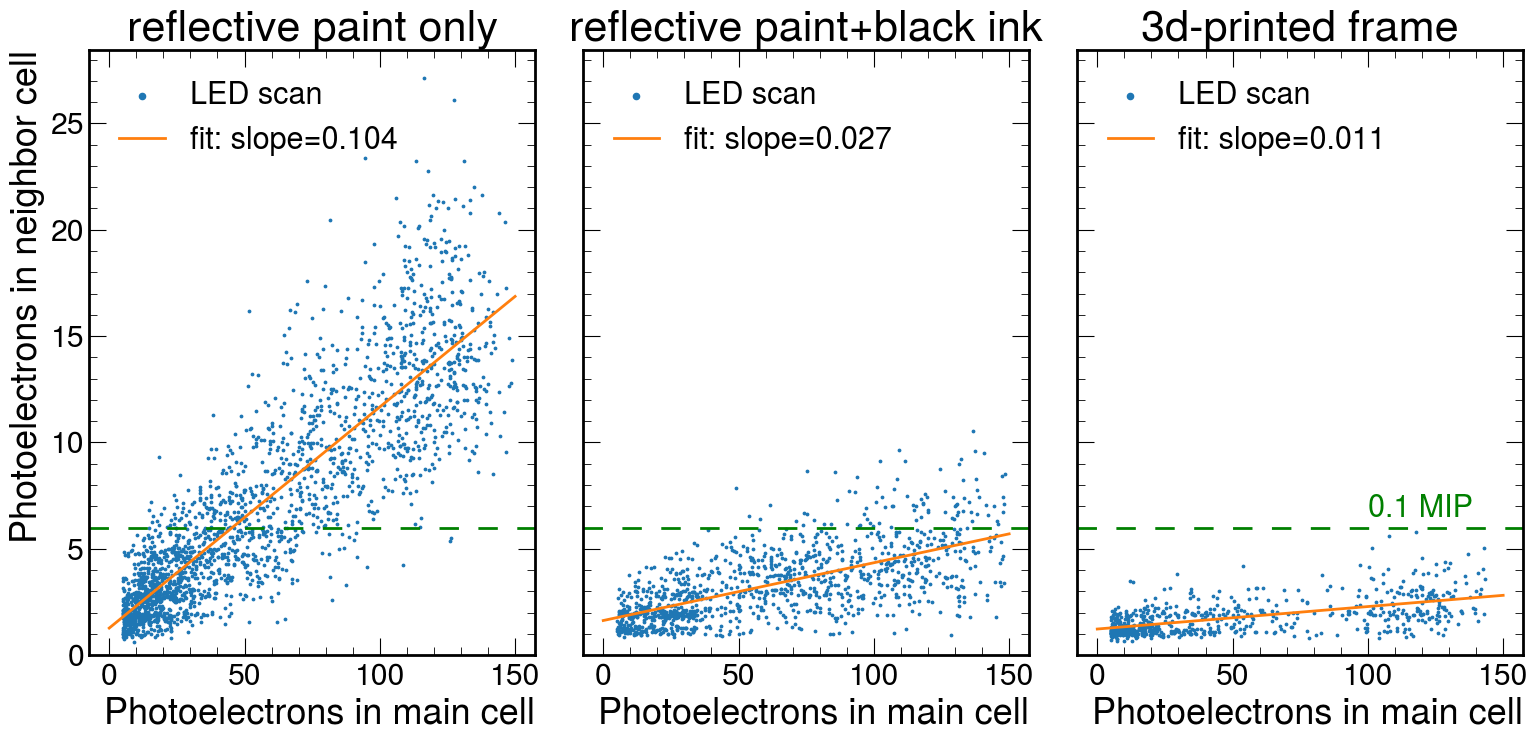

In [19]:
fig, axs=plt.subplots(1,3, figsize=(16, 16/2.),sharey='all')

keys="paint", "sharpie", "frame"
titles="reflective paint only", "reflective paint+black ink", "3d-printed frame"
for i in range(3):
    plt.sca(axs[i])
    plt.title(titles[i])
    q="abs(ch1_time_smooth-ch2_time_smooth)<10 and ch1_P2P_smooth_PE>=5 and ch1_P2P_smooth_PE<149 and ch1_chisq<20"\
        +" and ch2_chisq<20"
    df= dfs[keys[i]].query(q)
    
    x=df.ch1_P2P_smooth_PE
    y=df.ch2_P2P_smooth_PE
    
    m=(len(x)*sum(x*y)-sum(x)*sum(y))/(len(x)*sum(x*x)-sum(x)*sum(x))
    b = (sum(y)-sum(x)*m)/len(x)
    
    xx=np.array([0, 150])
    print(xx, m*xx+b)
    
    plt.scatter(df.ch1_P2P_smooth_PE,df.ch2_P2P_smooth_PE, s=3)
    plt.scatter([],[], s=20, label='LED scan', color='tab:blue')
    plt.plot(xx, m*xx+b, linestyle='-', label=f'fit: slope={m:.3f}', color='tab:orange', linewidth=2)
    plt.xlabel("Photoelectrons in main cell")
    if i == 0:
        plt.ylabel("Photoelectrons in neighbor cell")
    plt.legend(loc="upper left", fontsize=22)
    plt.ylim(0)
    plt.axhline(5.97, color='g', linestyle=(0,(7,7)), linewidth=2)
axs[2].text(100, 6.5, "0.1 MIP", fontsize=22, color='g')
plt.tight_layout()
plt.savefig("Crosstalk_SJP.pdf")
plt.show()

(array([0.12195122, 0.43292683, 0.30487805, 0.11585366, 0.02439024]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [<matplotlib.patches.Polygon at 0x12c6e30d0>])

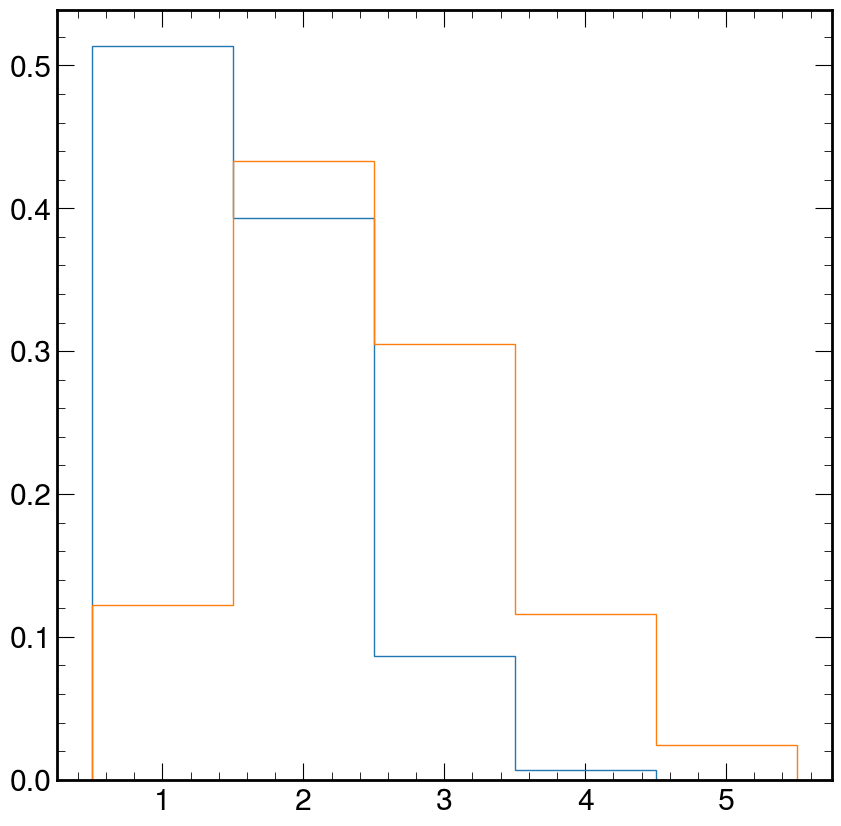

In [5]:
plt.hist(df.query('ch1_P2P_smooth_PE>20 and ch1_P2P_smooth_PE<50').ch2_P2P_smooth_PE,bins=np.linspace(0.5, 5.5, 6), histtype='step', density=True)
plt.hist(df.query('ch1_P2P_smooth_PE>100').ch2_P2P_smooth_PE,bins=np.linspace(0.5, 5.5, 6), histtype='step', density=True)

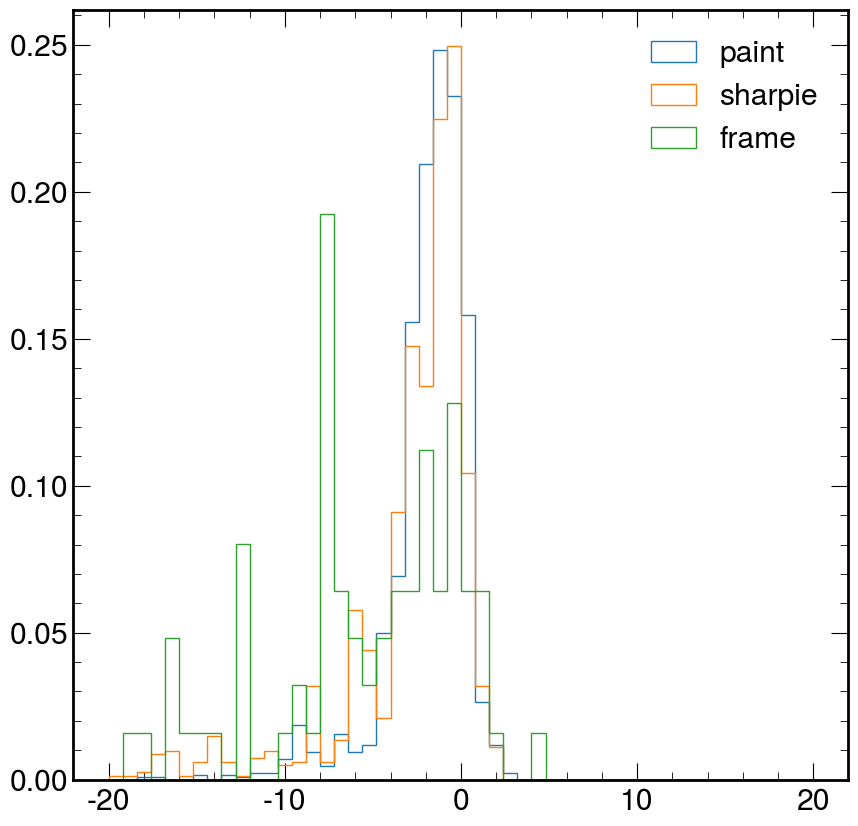

In [76]:

keys="paint", "sharpie", "frame"
for key in keys:
    df = dfs[key].query("ch1_P2P_smooth_PE>10 and ch2_P2P_smooth_PE>3 and ch1_chisq<20 and ch2_chisq<20")
    plt.hist(df.eval("ch1_time_smooth-ch2_time_smooth"), histtype='step', 
             density=True, bins=50, range=(-20,20), label=key),
plt.legend()

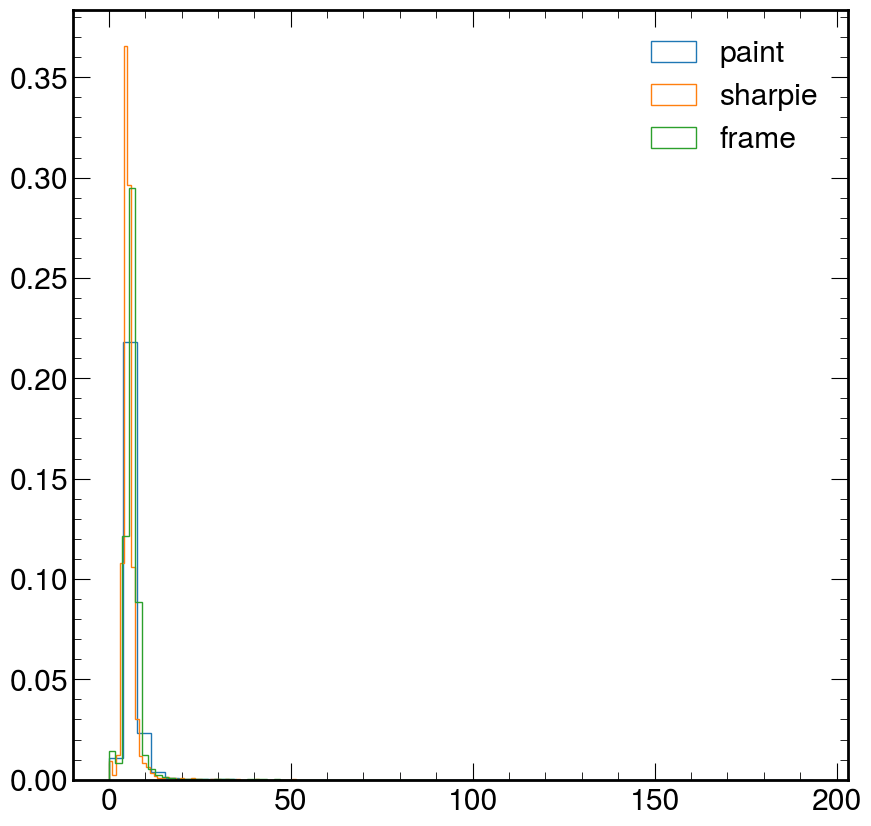

In [75]:

keys="paint", "sharpie", "frame"
for key in keys:
    df = dfs[key].query("ch2_P2P_smooth_PE<10000")
    plt.hist(df.eval("ch2_chisq"), histtype='step', 
             density=True, bins=50, label=key),
plt.legend()

In [83]:
for df in dfs.values():
    print(df.columns)

Index(['ch1_chisq', 'ch1_P2P_raw', 'ch1_P2P_base', 'ch1_P2P_smooth',
       'ch1_P2P_fit', 'ch1_time_raw', 'ch1_time_base', 'ch1_time_fit',
       'ch1_time_smooth', 'ch2_chisq', 'ch2_P2P_raw', 'ch2_P2P_base',
       'ch2_P2P_smooth', 'ch2_P2P_fit', 'ch2_time_raw', 'ch2_time_base',
       'ch2_time_fit', 'ch2_time_smooth', 'ch3_chisq', 'ch3_P2P_raw',
       'ch3_P2P_base', 'ch3_P2P_smooth', 'ch3_P2P_fit', 'ch3_time_raw',
       'ch3_time_base', 'ch3_time_fit', 'ch3_time_smooth', 'ch4_chisq',
       'ch4_P2P_raw', 'ch4_P2P_base', 'ch4_P2P_smooth', 'ch4_P2P_fit',
       'ch4_time_raw', 'ch4_time_base', 'ch4_time_fit', 'ch4_time_smooth',
       'ch1_P2P_smooth_PE', 'ch2_P2P_smooth_PE'],
      dtype='object')
Index(['ch1_chisq', 'ch1_P2P_raw', 'ch1_P2P_base', 'ch1_P2P_smooth',
       'ch1_P2P_fit', 'ch1_time_raw', 'ch1_time_base', 'ch1_time_fit',
       'ch1_time_smooth', 'ch2_chisq', 'ch2_P2P_raw', 'ch2_P2P_base',
       'ch2_P2P_smooth', 'ch2_P2P_fit', 'ch2_time_raw', 'ch2_time_base',
  